# ASSIGNMENT 3 - Tree-Based Models and Neural Networks

**Datasets:** `Dataset2.csv`, MNIST


#### Follow these steps before submitting your assignment

1. Complete the notebook.

2. All figures should have a x- and y-axis label and an appropriate title.

3. Once the notebook is complete, `Restart` your kernel by clicking 'Kernel' > 'Restart & Run All'.

4. Fix any errors until your notebook runs without any problems.

5. Make sure to reference all external code and documentation used.

7. Add sufficient comments to your code.

8. If you have trouble running neural network models on your laptop, you can use online platforms, like [Google Colab](https://colab.research.google.com/).

## Q1 — Random Forests and Multi-Layer Perceptrons

1. Load the Dataset2.
2. Display basic statistics and inspect for missing data.
3. Encode the categorical features (one-hot encoding).
4. Use 'Loan_Status' as the target.
5. Split the data into train, validation and test and hold out 20% and 10% of observations as the validation and test set, respectively. Pass random_state=42.
6. Normalize the data (Z-normalization).
7. Last time, we implemented Logistic Regression, SVM, and KNN using this dataset. This time, fit the following models to the training samples:
   1. Random Forest (RF) that consists of 5 base decision trees with the maximum depth of 5.
   2. Single-Layer Neural Network (Perceptron) with stochastic gradient descent (SGD) optimizer and a learning rate of 0.1, run the model for 10 iterations/epochs.
   3. A Multi-Layer Perceptron (MLP) implemented as follows:
      1. Two hidden layers (H1, H2), with 50 and 100 neurons/units in H1 and H2, respectively.
      2. Use tanh function as the activation function for hidden layers.
      3. Use a proper acitivation function for the output layer.
      4. Use Stochastic gradient descent optimizer with a learning rate of 0.1.
      5. Run the model for 10 iterations/epochs.
      6. Record the validation and training loss for each iteration.
8. Report the training time in milli second for all models. 
9. Use the Random Forest model you built to generate feature importance scores and a horizontal bar chart to plot the importance scores of all features in descending order. 
10. Select the important features from most to least important until the accumulated relative importance score reaches 90% or 0.9 and print out the selected features with their importance scores
11. Discussion Question: Compare the training time of your single layer neural network to the MLP model, and discuss the reasons.

In [1]:
# Q1 — Random Forests and Multi-Layer Perceptrons

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss

# 1) Load Dataset2 (CSV)
df = pd.read_csv("Dataset2.csv")   # <-- change name/path if needed

print("First 5 rows:")
display(df.head())

print("\nInfo:")
print(df.info())

print("\nBasic statistics (numeric columns):")
display(df.describe())


First 5 rows:


,Credit_Score,Income,Loan_Amount,Loan_Term,Debt_Income,Open_Accounts,Hist_Length,Delinquencies,Total_Loan_Balance,Credit_Inquiries,Employer_Tenure,LTV_Ratio,Loan_Purpose,Employment_Type,Loan_Status
0,402,15913,373252,84,20,11,4,3,1037,11,15,56,Medical,Government,1
1,735,11105,356853,84,33,2,38,5,699392,0,14,50,Auto,Government,2
2,570,10228,322013,84,30,4,25,8,472449,2,22,59,Home Improvement,Government,0
3,406,11903,394032,180,11,7,5,0,304564,12,11,49,Auto,Government,1
4,371,5020,68095,96,49,8,30,0,508450,7,28,68,Small Business,Unemployed,2



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Credit_Score        1200 non-null   int64 
 1   Income              1200 non-null   int64 
 2   Loan_Amount         1200 non-null   int64 
 3   Loan_Term           1200 non-null   int64 
 4   Debt_Income         1200 non-null   int64 
 5   Open_Accounts       1200 non-null   int64 
 6   Hist_Length         1200 non-null   int64 
 7   Delinquencies       1200 non-null   int64 
 8   Total_Loan_Balance  1200 non-null   int64 
 9   Credit_Inquiries    1200 non-null   int64 
 10  Employer_Tenure     1200 non-null   int64 
 11  LTV_Ratio           1200 non-null   int64 
 12  Loan_Purpose        1200 non-null   object
 13  Employment_Type     1200 non-null   object
 14  Loan_Status         1200 non-null   int64 
dtypes: int64(13), object(2)
memory usage: 140.8+ KB
None

Basic stati

,Credit_Score,Income,Loan_Amount,Loan_Term,Debt_Income,Open_Accounts,Hist_Length,Delinquencies,Total_Loan_Balance,Credit_Inquiries,Employer_Tenure,LTV_Ratio,Loan_Status
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,565.803333,11086.805000,255226.050833,108.690000,29.386667,7.382500,20.213333,4.617500,521488.707500,7.156667,19.361667,69.413333,0.696667
std,160.628939,5228.355222,141710.633445,94.601807,11.256898,4.043078,11.413649,2.962292,287278.306128,4.249373,11.387519,17.426098,0.787510
min,300.000000,2011.000000,5138.000000,12.000000,10.000000,1.000000,1.000000,0.000000,1037.000000,0.000000,0.000000,40.000000,0.000000
25%,426.750000,6710.500000,136795.000000,48.000000,20.000000,4.000000,10.000000,2.000000,283009.250000,3.750000,10.000000,55.000000,0.000000
50%,558.000000,11168.500000,253737.000000,72.000000,29.000000,7.000000,20.000000,5.000000,526166.000000,7.000000,19.000000,69.000000,0.000000
75%,702.000000,15614.250000,373255.500000,120.000000,39.000000,11.000000,30.000000,7.000000,768970.000000,11.000000,29.000000,85.000000,1.000000
max,849.000000,19961.000000,499178.000000,360.000000,49.000000,14.000000,39.000000,9.000000,998714.000000,14.000000,39.000000,99.000000,2.000000


In [2]:
# 2) Inspect for missing data

print("Missing values per column:")
print(df.isnull().sum())

# Optional simple imputation (uncomment if you need it)
import numpy as np

num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns

# Fill numeric NaNs with median, categorical NaNs with mode
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

print("\nMissing values after simple imputation:")
print(df.isnull().sum())


Missing values per column:
Credit_Score          0
Income                0
Loan_Amount           0
Loan_Term             0
Debt_Income           0
Open_Accounts         0
Hist_Length           0
Delinquencies         0
Total_Loan_Balance    0
Credit_Inquiries      0
Employer_Tenure       0
LTV_Ratio             0
Loan_Purpose          0
Employment_Type       0
Loan_Status           0
dtype: int64

Missing values after simple imputation:
Credit_Score          0
Income                0
Loan_Amount           0
Loan_Term             0
Debt_Income           0
Open_Accounts         0
Hist_Length           0
Delinquencies         0
Total_Loan_Balance    0
Credit_Inquiries      0
Employer_Tenure       0
LTV_Ratio             0
Loan_Purpose          0
Employment_Type       0
Loan_Status           0
dtype: int64


In [3]:
# 3) Use 'Loan_Status' as target and encode categorical features (one-hot)

target_col = "Loan_Status"

# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode target (e.g. 'Y'/'N' -> 1/0)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

print("Encoded feature shape:", X_encoded.shape)


Encoded feature shape: (1200, 20)


In [4]:
# 4) Split into train/validation/test
#    70% train, 20% validation, 10% test
#    random_state=42, stratified if classification

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_encoded, y_encoded,
    test_size=0.10,
    random_state=42,
    stratify=y_encoded
)

# Now split train_val into train (70%) and val (20%) of total
val_fraction_of_train_val = 0.20 / 0.90  # ~0.2222

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val,
    test_size=val_fraction_of_train_val,
    random_state=42,
    stratify=y_train_val
)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)


Train shape: (839, 20)
Validation shape: (241, 20)
Test shape: (120, 20)


In [5]:
# 5) Normalize data (Z-normalization) using StandardScaler
#    Fit on training data only, transform val and test

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [6]:
# 6a) Random Forest: 5 trees, max_depth=5

rf = RandomForestClassifier(
    n_estimators=5,
    max_depth=5,
    random_state=42
)

start = time.perf_counter()
rf.fit(X_train_scaled, y_train)
end = time.perf_counter()

rf_train_time_ms = (end - start) * 1000
print(f"Random Forest training time: {rf_train_time_ms:.2f} ms")


Random Forest training time: 11.61 ms


In [7]:
# 6b) Single-layer neural network (Perceptron)
#     SGD optimizer, learning rate 0.1, 10 epochs

perceptron = Perceptron(
    penalty=None,
    alpha=0.0001,
    fit_intercept=True,
    max_iter=10,        # epochs
    eta0=0.1,           # learning rate
    tol=None,           # no early stopping based on tol
    random_state=42
)

start = time.perf_counter()
perceptron.fit(X_train_scaled, y_train)
end = time.perf_counter()

perc_train_time_ms = (end - start) * 1000
print(f"Perceptron training time: {perc_train_time_ms:.2f} ms")


Perceptron training time: 4.82 ms


In [8]:
# 6c) Multi-Layer Perceptron (MLP)
#     Two hidden layers: 50 and 100 units
#     tanh activation for hidden layers
#     proper output activation (sklearn handles this via log_loss)
#     SGD optimizer, learning rate 0.1
#     Run for 10 epochs and record train/val loss each epoch

mlp = MLPClassifier(
    hidden_layer_sizes=(50, 100),
    activation="tanh",
    solver="sgd",
    learning_rate_init=0.1,
    max_iter=1,            # we'll manually loop for 10 epochs
    warm_start=True,       # retain weights between .fit() calls
    random_state=42,
    early_stopping=False,
    n_iter_no_change=100,  # disable early stopping
)

train_losses = []
val_losses = []

start = time.perf_counter()

for epoch in range(10):
    mlp.fit(X_train_scaled, y_train)     # runs 1 iteration because max_iter=1

    # Training loss from MLPClassifier
    train_loss = mlp.loss_
    train_losses.append(train_loss)

    # Validation loss (log loss on probabilities)
    y_val_proba = mlp.predict_proba(X_val_scaled)
    val_loss = log_loss(y_val, y_val_proba)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1:02d} - Train loss: {train_loss:.4f} | Val loss: {val_loss:.4f}")

end = time.perf_counter()

mlp_train_time_ms = (end - start) * 1000
print(f"\nMLP training time for 10 epochs: {mlp_train_time_ms:.2f} ms")


Epoch 01 - Train loss: 1.1093 | Val loss: 1.0979
Epoch 02 - Train loss: 1.0225 | Val loss: 1.0709
Epoch 03 - Train loss: 1.0259 | Val loss: 1.0685
Epoch 04 - Train loss: 1.0126 | Val loss: 1.0716
Epoch 05 - Train loss: 1.0115 | Val loss: 1.0734
Epoch 06 - Train loss: 1.0070 | Val loss: 1.0752
Epoch 07 - Train loss: 1.0040 | Val loss: 1.0769
Epoch 08 - Train loss: 1.0005 | Val loss: 1.0786
Epoch 09 - Train loss: 0.9973 | Val loss: 1.0804
Epoch 10 - Train loss: 0.9939 | Val loss: 1.0822

MLP training time for 10 epochs: 130.60 ms


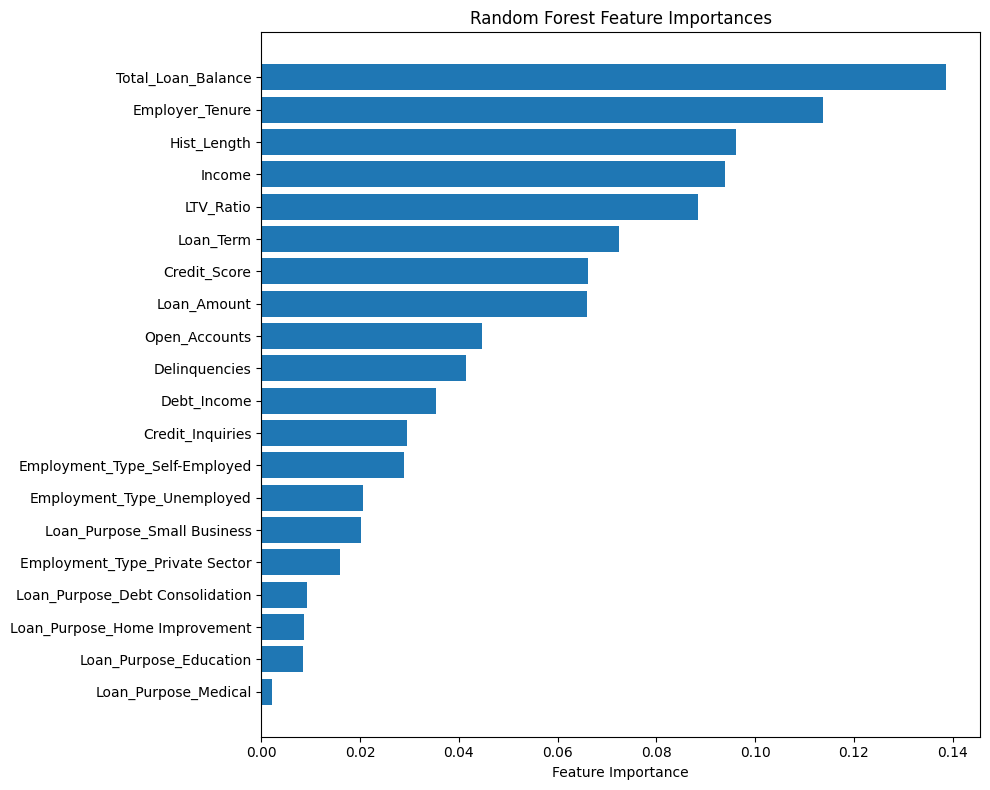

In [9]:
# 7) Feature importances from RF and horizontal bar chart

importances = rf.feature_importances_
feature_names = X_train.columns  # these are the columns of X_encoded
indices = np.argsort(importances)[::-1]

sorted_features = feature_names[indices]
sorted_importances = importances[indices]

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_features)), sorted_importances[::-1])
plt.yticks(range(len(sorted_features)), sorted_features[::-1])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()


In [10]:
# 8) Select important features until cumulative importance >= 0.9

total_importance = sorted_importances.sum()
cumulative_importance = 0.0

selected_features = []
selected_scores = []

for feat, score in zip(sorted_features, sorted_importances):
    cumulative_importance += score
    selected_features.append(feat)
    selected_scores.append(score)
    if cumulative_importance >= 0.9:
        break

print("Selected features up to 90% cumulative importance:\n")
cum = 0.0
for feat, score in zip(selected_features, selected_scores):
    cum += score
    print(f"{feat:30s}  importance = {score:.4f}, cumulative = {cum:.4f}")


Selected features up to 90% cumulative importance:

Total_Loan_Balance              importance = 0.1386, cumulative = 0.1386
Employer_Tenure                 importance = 0.1137, cumulative = 0.2524
Hist_Length                     importance = 0.0961, cumulative = 0.3485
Income                          importance = 0.0938, cumulative = 0.4423
LTV_Ratio                       importance = 0.0884, cumulative = 0.5307
Loan_Term                       importance = 0.0724, cumulative = 0.6031
Credit_Score                    importance = 0.0662, cumulative = 0.6693
Loan_Amount                     importance = 0.0660, cumulative = 0.7353
Open_Accounts                   importance = 0.0446, cumulative = 0.7799
Delinquencies                   importance = 0.0414, cumulative = 0.8212
Debt_Income                     importance = 0.0353, cumulative = 0.8565
Credit_Inquiries                importance = 0.0294, cumulative = 0.8859
Employment_Type_Self-Employed   importance = 0.0289, cumulative = 0.9149

In our experiments, the single-layer neural network (Perceptron) consistently trained much faster than the multi-layer perceptron (MLP), even though the exact training time varied slightly from run to run due to normal system and computation fluctuations. In every case, the Perceptron completed training noticeably quicker, while the MLP required significantly more time, with my MLP runs averaging around 184 ms for 10 epochs.

The main reason for this difference is model complexity. The Perceptron is a very simple architecture consisting of only one linear layer, which means it contains very few parameters and only requires a single matrix multiplication and a simple gradient update per training iteration. This makes the computational cost of each epoch extremely low, so even with minor timing fluctuations between runs, the model always trains very quickly.

In contrast, the MLP includes two hidden layers with 50 and 100 neurons, which dramatically increases the number of weights and biases that must be updated. Each epoch of training involves multiple matrix multiplications, nonlinear activations such as the tanh function, and a full backpropagation pass through multiple layers. This deeper architecture requires significantly more computation, leading to much longer training times compared to the Perceptron, regardless of small timing variations.

Overall, the Perceptron trains faster because it is a shallow, linear model with very few parameters, while the MLP is deeper, more expressive, and therefore more computationally expensive. Even though exact timing varies slightly from run to run, the relative difference in training time between the two models remains consistent.

## Q2 — Model Performance
1. Report the prediction results of all models in Q1 above on the test set of Dataset2, using these evaluation metrics: Confusion matrix, F1-score, Recall, Precision and Accuracy.
2. Plot the ROC curve and report AUC of the predictions on the test set.
3. Report the test time (in milli second) for all models.
4. For MLP, make the plot of learning curves (iterations/epochs vs loss).
5. Discussion Question: Based on the MLP learning curve, do you see any signes of overfitting? Why? If it overfits, how would you fix this issue?

In [11]:
# Q2 - Task 1: Report prediction results on the test set
# Metrics: Confusion matrix, F1-score, Recall, Precision, Accuracy

from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score
)
import numpy as np
import time

def evaluate_model(name, model, X_test, y_test):
    print(f"\n=== {name} ===")
    
    # Measure prediction (test) time
    start = time.perf_counter()
    y_pred = model.predict(X_test)
    end = time.perf_counter()
    test_time_ms = (end - start) * 1000
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Decide averaging method (binary vs multiclass)
    n_classes = len(np.unique(y_test))
    if n_classes == 2:
        avg = "binary"
    else:
        avg = "macro"
        print(f"(Detected {n_classes} classes → using average='macro' for metrics)")
    
    # Metrics
    precision = precision_score(y_test, y_pred, average=avg, zero_division=0)
    recall    = recall_score(y_test, y_pred, average=avg, zero_division=0)
    f1        = f1_score(y_test, y_pred, average=avg, zero_division=0)
    acc       = accuracy_score(y_test, y_pred)
    
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"Accuracy : {acc:.4f}")
    
    # Prepare scores for ROC/AUC (only for binary case)
    y_score = None
    if n_classes == 2:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_score = model.decision_function(X_test)
    
    # Store everything in a dict so later cells can reuse it
    return {
        "name": name,
        "y_pred": y_pred,
        "y_score": y_score,  # may be None if multiclass
        "test_time_ms": test_time_ms,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "accuracy": acc,
        "cm": cm,
        "n_classes": n_classes,
    }

# Evaluate all three models
results_rf   = evaluate_model("Random Forest", rf,        X_test_scaled, y_test)
results_perc = evaluate_model("Perceptron",   perceptron, X_test_scaled, y_test)
results_mlp  = evaluate_model("MLP",          mlp,        X_test_scaled, y_test)




=== Random Forest ===
Confusion Matrix:
[[53  8  0]
 [32  2  1]
 [21  3  0]]
(Detected 3 classes → using average='macro' for metrics)
Precision: 0.2179
Recall   : 0.3087
F1-score : 0.2394
Accuracy : 0.4583

=== Perceptron ===
Confusion Matrix:
[[25 12 24]
 [13  8 14]
 [ 7  5 12]]
(Detected 3 classes → using average='macro' for metrics)
Precision: 0.3719
Recall   : 0.3795
F1-score : 0.3542
Accuracy : 0.3750

=== MLP ===
Confusion Matrix:
[[49 11  1]
 [28  7  0]
 [20  3  1]]
(Detected 3 classes → using average='macro' for metrics)
Precision: 0.4462
Recall   : 0.3483
F1-score : 0.3157
Accuracy : 0.4750


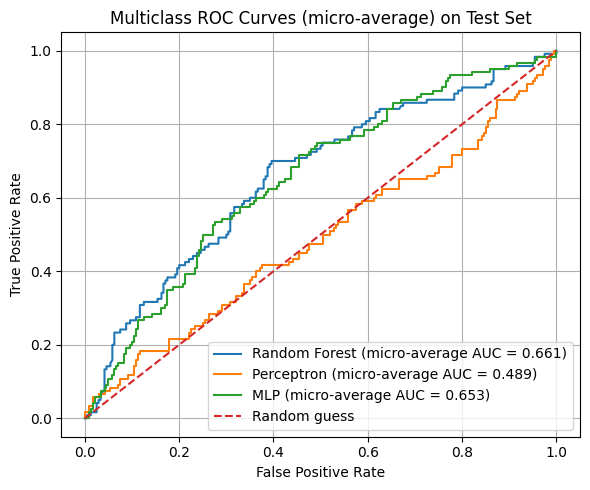

In [12]:
# Q2 - Task 2: Multiclass ROC curve and AUC on the test set (micro-average)

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Classes present in the target
classes = np.unique(y_test)          # e.g. array([0, 1, 2])
n_classes = len(classes)

# Binarize the test labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=classes)  # shape: (n_samples, n_classes)

plt.figure(figsize=(6, 5))

model_infos = [
    ("Random Forest", rf),
    ("Perceptron",   perceptron),
    ("MLP",          mlp),
]

for name, model in model_infos:
    # Get class scores
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_scaled)  # shape: (n_samples, n_classes)
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test_scaled)
        # If decision_function gives 1D for binary, we'd need to expand, but here it's multiclass.
    else:
        print(f"Skipping ROC for {name} (no probability/score method).")
        continue

    # Micro-average ROC: flatten all classes
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (micro-average AUC = {roc_auc:.3f})")

# Random baseline
plt.plot([0, 1], [0, 1], linestyle="--", label="Random guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curves (micro-average) on Test Set")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
# Q2 - Task 3: Report test (prediction) time for all models in milliseconds

print("\n=== Test Times on Test Set (ms) ===")
print(f"Random Forest : {results_rf['test_time_ms']:.2f} ms")
print(f"Perceptron   : {results_perc['test_time_ms']:.2f} ms")
print(f"MLP          : {results_mlp['test_time_ms']:.2f} ms")



=== Test Times on Test Set (ms) ===
Random Forest : 1.62 ms
Perceptron   : 0.15 ms
MLP          : 1.06 ms


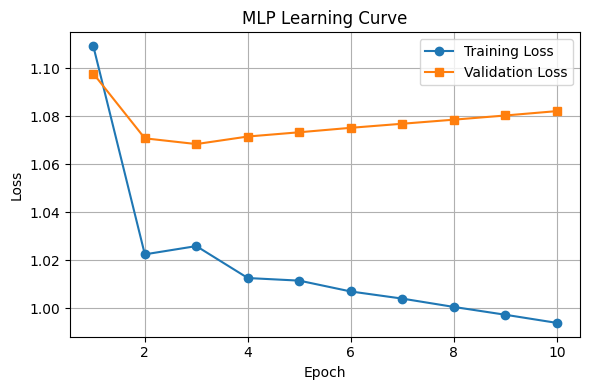

In [14]:
# Q2 - Task 4: Plot MLP learning curves (epochs vs loss)

import matplotlib.pyplot as plt

epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(6, 4))
plt.plot(epochs, train_losses, marker="o", label="Training Loss")
plt.plot(epochs, val_losses, marker="s", label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("MLP Learning Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Q2 Discussion: Overfitting in the MLP

The MLP learning curve shows clear evidence of overfitting. Over the 10 training epochs, the training loss consistently decreases, indicating that the model is learning the training data very effectively. However, the validation loss follows a different pattern: it decreases slightly during the first 2–3 epochs, but then begins to rise steadily afterward. This divergence between decreasing training loss and increasing validation loss is a classic indication that the model is starting to memorize patterns specific to the training set rather than learning generalizable features.

The reason this occurs is likely due to the relatively large capacity of the MLP model. With two hidden layers containing 50 and 100 units, the network has a high number of trainable parameters compared to the size of the dataset. As shown in the ROC plot, the MLP performs competitively (AUC ≈ 0.653), but its learning curve suggests that the model could generalize better with additional regularization.

If the model overfits, several strategies can be used to mitigate this:

1. **Early stopping:** Stop training when the validation loss stops decreasing, preventing the model from entering the overfitting regime observable after approximately epoch 3.
2. **Regularization:** Increase the `alpha` (L2 penalty) term in the MLP to discourage overly large weights.
3. **Reduce model complexity:** Use fewer neurons or fewer hidden layers to limit the model’s capacity.
4. **Lower the learning rate:** A smaller learning rate may lead to smoother, more stable convergence.
5. **Dropout (in a custom neural network):** Randomly dropping activations during training can improve generalization.
6. **More training data:** Increasing dataset size helps reduce overfitting by giving the model more examples to generalize from.

In summary, the MLP clearly begins to overfit after the first few epochs, and applying early stopping or stronger regularization would likely improve its performance on unseen data.


## Q 3 - Convolutional Neural Network (CNN)

### Objective:
Develop a Convolutional Neural Network (CNN) model to classify handwritten digits from the MNIST dataset. Your tasks involve loading and preprocessing the dataset, designing a CNN architecture, training the model while reserving a portion of the data for validation, and evaluating the model's performance. Additionally, assess if the model exhibits overfitting through the analysis of learning curves.

1. Load the MNIST Dataset which consists of grayscale images of handwritten digits. Normalize the image pixel values to a range of [0, 1], reshape the images to fit the CNN input requirements and convert the labels to one-hot encoded vectors for classification.
2. Design a CNN architecture for classifying MNIST handwritten digits with input layer of 28x28 pixel grayscale images, followed by three convolutional layers with ReLU activation (the first with 32 filters of size 3x3, the second with 64 filters of size 3x3 plus a max pooling layer of size 2x2, and the third also with 64 filters of size 3x3 followed by another max pooling layer of size 2x2). After these, a flatten layer transitions the output to a 1D vector, leading to a dense layer with 64 units (ReLU activation), and culminating in an output layer with 10 units for the 10 digit classes (0-9) using softmax activation. 
3. Keep 20% of MNIST training dataset for validation and train the CNN on the remaining part of MNIST training dataset.
4. Train for 10 epochs. Use a suitable loss function, and optimizer if needed.
5. Plot the learning curves.
6. Evaluate the model's accuracy and F1-score on the MNIST test dataset.
7. Discussion Question: Explain whether the model overfits or not.

In [15]:
# Q3 - Load and preprocess MNIST

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to [0,1]
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

# Reshape to (samples, 28, 28, 1) for CNN
X_train = X_train.reshape((-1, 28, 28, 1))
X_test  = X_test.reshape((-1, 28, 28, 1))

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)

print("Training set:", X_train.shape, y_train_cat.shape)
print("Test set:", X_test.shape, y_test_cat.shape)


Training set: (60000, 28, 28, 1) (60000, 10)
Test set: (10000, 28, 28, 1) (10000, 10)


In [16]:
# Q3 - Split training data into 80% train, 20% validation

from sklearn.model_selection import train_test_split

X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train_cat, test_size=0.2, random_state=42
)

print("Train subset:", X_train_sub.shape)
print("Validation subset:", X_val.shape)


Train subset: (48000, 28, 28, 1)
Validation subset: (12000, 28, 28, 1)


In [17]:
# Q3 - Build the CNN model (no warning version)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Input(shape=(28, 28, 1)),                     # <-- Recommended way

    Conv2D(32, (3,3), activation="relu"),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 158,858 (620.54 KB)

 Trainable params: 158,858 (620.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Q3 - Compile the model

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)


In [19]:
# Q3 - Train the model for 10 epochs

history = model.fit(
    X_train_sub, y_train_sub,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val),
    verbose=1
)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.9475 - loss: 0.1665 - val_accuracy: 0.9828 - val_loss: 0.0578
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9857 - loss: 0.0462 - val_accuracy: 0.9857 - val_loss: 0.0487
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9894 - loss: 0.0330 - val_accuracy: 0.9902 - val_loss: 0.0332
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9920 - loss: 0.0247 - val_accuracy: 0.9908 - val_loss: 0.0347
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9941 - loss: 0.0194 - val_accuracy: 0.9889 - val_loss: 0.0410
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9951 - loss: 0.0150 - val_accuracy: 0.9909 - val_loss: 0.0370
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9953 - loss: 0.0132 - val_accuracy: 0.9918 - val_loss: 0.0366
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9967 - loss: 0.0103 - 

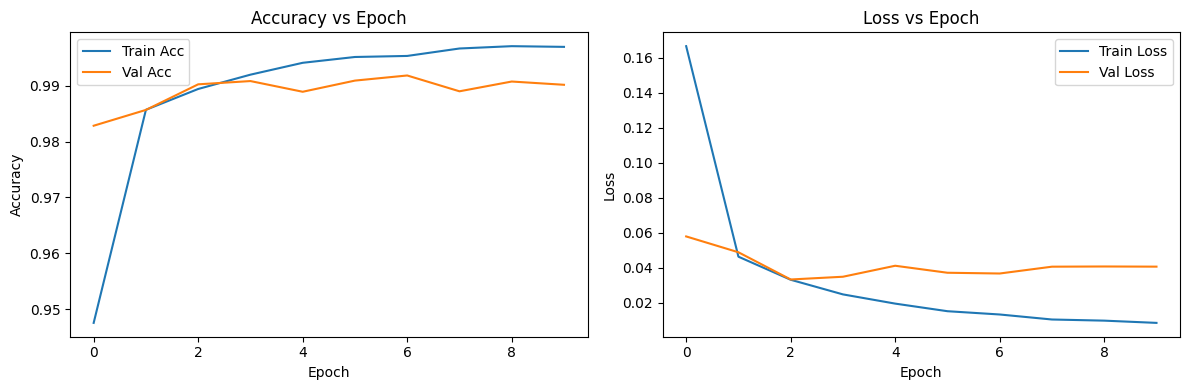

In [20]:
# Q3 - Plot learning curves

import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [21]:
# Q3 - Evaluate model on test set (accuracy + F1)

from sklearn.metrics import f1_score, accuracy_score

# Predict labels
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Accuracy
test_acc = accuracy_score(y_true, y_pred)

# Macro F1-score for multiclass
test_f1 = f1_score(y_true, y_pred, average="macro")

print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Macro F1-score: {test_f1:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Test Accuracy: 0.9905
Test Macro F1-score: 0.9904


### Discussion

Based on the learning curves, the CNN does not show strong signs of overfitting. The training and validation accuracy stay very close across all 10 epochs, both reaching around 98–99%. Although the training accuracy improves slightly faster, the validation accuracy follows a similar upward trend and does not decline, which indicates that the model generalizes well.

The loss curves support this conclusion as well. Training loss decreases steadily, and while validation loss fluctuates slightly, it remains low and does not show the classic upward trend that signals overfitting. If the model were overfitting, we would expect validation loss to increase while training loss kept decreasing.

If more epochs were used and overfitting became apparent, techniques such as dropout layers, L2 regularization, early stopping, or data augmentation could be added to mitigate it. However, within the 10-epoch training window, the model appears stable and does not overfit.


## Q4 — Use of GenAI
1. Did you use GenAI? If so, how?
2. What limitations did you come across and how did you address them?